In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread(r"D:\Academics\image_processing\images\store\store_shelf.png", cv.IMREAD_REDUCED_COLOR_2)
template = cv.imread(r"D:\Academics\image_processing\images\store\oat_crunch.jpg", cv.IMREAD_REDUCED_COLOR_2)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(image, None)
kp2, des2 = sift.detectAndCompute(template, None)

In [21]:
print(f"Number of keypoints in first image: {len(kp1)}")
print(f"Number of keypoints in second image: {len(kp2)}")

Number of keypoints in first image: 1853
Number of keypoints in second image: 310


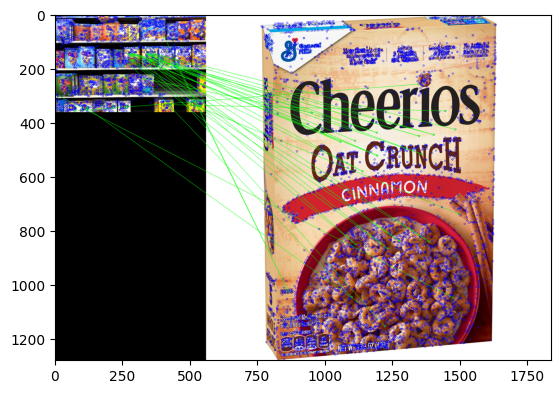

In [13]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

#Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
#ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

dra_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = cv.DrawMatchesFlags_DEFAULT) 

img3 = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **dra_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()

In [17]:
image_2 = cv.imread(r"D:\Academics\image_processing\images\store\assassins_creed_collection.png", cv.IMREAD_REDUCED_COLOR_2)
template_2 = cv.imread(r"D:\Academics\image_processing\images\store\Assassins_Creed_brotherhood.jpg", cv.IMREAD_REDUCED_COLOR_2)

sift = cv.SIFT_create()
kp1_2, des1_2 = sift.detectAndCompute(image_2, None)
kp2_2, des2_2 = sift.detectAndCompute(template_2, None)

In [19]:
print(f"Number of keypoints in first image: {len(kp1_2)}")
print(f"Number of keypoints in second image: {len(kp2_2)}")


Number of keypoints in first image: 1853
Number of keypoints in second image: 310


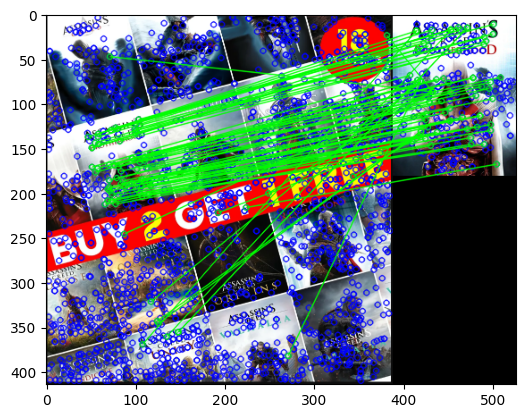

In [20]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1_2,des2_2,k=2)

#Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
#ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

dra_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = cv.DrawMatchesFlags_DEFAULT) 

img3 = cv.drawMatchesKnn(image_2, kp1_2, template_2, kp2_2, matches, None, **dra_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()